# Experimenting with Feedback Analysis using Sentiment Analysis and Collaborative Filtering

## Data

### Child Feature Data

The dataset comprises generated data on 30 children, including features such as age, gender, and health considerations. These features are known to influence food preferences significantly. Such data could be collected through an app or existing school databases. Over time, with enough data, these features could be used to predict whether a new individual will like a particular food.

In [97]:
def get_child_data():
    child_features = {
        "child1": {"age": 10, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child2": {"age": 8, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "Italian"},
        "child3": {"age": 9, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child4": {"age": 7, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child5": {"age": 11, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child6": {"age": 12, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child7": {"age": 9, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child8": {"age": 8, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "Italian"},
        "child9": {"age": 10, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child10": {"age": 11, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child11": {"age": 7, "gender": "F", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child12": {"age": 9, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child13": {"age": 8, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Chinese"},
        "child14": {"age": 10, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Chinese"},
        "child15": {"age": 12, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Chinese"},
        "child16": {"age": 11, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Chinese"},
        "child17": {"age": 9, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child18": {"age": 7, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Chinese"},
        "child19": {"age": 8, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Chinese"},
        "child20": {"age": 10, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "British"},
        "child21": {"age": 10, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "British"},
        "child22": {"age": 7, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "British"},
        "child23": {"age": 9, "gender": "F", "health_consideration": "moderately health conscious", "favorite_cuisine": "British"},
        "child24": {"age": 8, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "British"},
        "child25": {"age": 11, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "British"},
        "child26": {"age": 12, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "British"},
        "child27": {"age": 9, "gender": "F", "health_consideration": "moderately health conscious", "favorite_cuisine": "Chinese"},
        "child28": {"age": 7, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Chinese"},
        "child29": {"age": 8, "gender": "M", "health_consideration": "very health conscious", "favorite_cuisine": "Italian"},
        "child30": {"age": 10, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"}
    }
    return child_features


### Child Preference Data
The dataset comprises generated preferences for 30 children. In a real-world scenario, such data could be collected through questionnaires or feedback after meals. This serves as the starting point for this notebook. For this example, the data is generated based on a study that discovered vegetables are grouped according to dislike. Each child is assigned a chance of liking, being neutral, or disliking all ingredients within a group. These probabilities are roughly estimated from the research paper.

Reference: [Study on children's vegetable preferences](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6173934/)


In [98]:
import random

def initialize_children_data(child_features):
    # Define vegetable groups with descriptions
    vegetable_groups = {
        "Group A": ["tomato", "corn", "pumpkin", "carrot"],
        "Group B": ["onion", "red pepper"],
        "Group C": ["cauliflower"],
        "Group D": ["zucchini", "spinach", "chard", "peas"],
        "Group E": ["beetroot", "lettuce", "broccoli"],
        "Group F": ["eggplant", "cucumber", "cabbage", "green beans"]
    }

    # Define probabilities based on group descriptions
    probabilities = {
        "Group A": {"like": 0.7, "neutral": 0.2, "dislike": 0.1},  # Most liked
        "Group B": {"like": 0.4, "neutral": 0.3, "dislike": 0.3},  # Camouflaged in recipes
        "Group C": {"like": 0.1, "neutral": 0.2, "dislike": 0.7},  # Strongly disliked
        "Group D": {"like": 0.3, "neutral": 0.3, "dislike": 0.4},  # Camouflaged but some forced
        "Group E": {"like": 0.2, "neutral": 0.3, "dislike": 0.5},  # Offered but often rejected
        "Group F": {"like": 0.2, "neutral": 0.3, "dislike": 0.5}   # Rarely offered, often rejected
    }

    children_data = {}

# Iterate over each child in the dataset
    for child_key, features in child_features.items():
        # Get the health consideration feature for the current child
        health_consideration = features["health_consideration"]
        
        # Calculate like probability modifier based on health consideration
        # More health conscious children have a higher modifier, making them less likely to dislike vegetables
        if health_consideration == "very health conscious":
            like_modifier = 0.2
        elif health_consideration == "moderately health conscious":
            like_modifier = 0.1
        else:
            like_modifier = 0

        # Initialize the preferences for the current child
        preferences = {"likes": [], "neutral": [], "dislikes": []}

        # Assign preferences based on group probabilities and health consideration
        for group, veggies in vegetable_groups.items():
            for veggie in veggies:
                # Generate a random value between 0 and 1
                rand_val = random.random()
                # Get the probability distribution for the current group
                prob = probabilities[group]
                
                # Determine preference based on probabilities and health consideration modifier
                if rand_val < prob["like"] - like_modifier:
                    preferences["likes"].append(veggie)
                elif rand_val < prob["like"] + prob["neutral"]:
                    preferences["neutral"].append(veggie)
                else:
                    preferences["dislikes"].append(veggie)

        # Store the preferences for the current child
        children_data[child_key] = preferences
    
    return children_data

child_features = get_child_data()
children_data = initialize_children_data(child_features)
# print(children_data)
for child, preferences in children_data.items():
    print(f"{child}: {preferences}")



child1: {'likes': ['corn', 'pumpkin', 'carrot', 'peas', 'lettuce'], 'neutral': ['tomato', 'zucchini', 'chard', 'broccoli', 'cucumber', 'cabbage'], 'dislikes': ['onion', 'red pepper', 'cauliflower', 'spinach', 'beetroot', 'eggplant', 'green beans']}
child2: {'likes': ['tomato', 'corn', 'carrot', 'chard'], 'neutral': ['pumpkin', 'onion', 'red pepper', 'cauliflower', 'zucchini', 'eggplant', 'cucumber', 'cabbage', 'green beans'], 'dislikes': ['spinach', 'peas', 'beetroot', 'lettuce', 'broccoli']}
child3: {'likes': ['pumpkin', 'carrot', 'spinach'], 'neutral': ['tomato', 'corn', 'onion', 'red pepper', 'cauliflower', 'zucchini', 'chard', 'beetroot', 'lettuce', 'eggplant', 'cucumber', 'green beans'], 'dislikes': ['peas', 'broccoli', 'cabbage']}
child4: {'likes': ['tomato', 'red pepper', 'spinach', 'broccoli', 'eggplant'], 'neutral': ['corn', 'pumpkin', 'carrot', 'lettuce', 'cabbage'], 'dislikes': ['onion', 'cauliflower', 'zucchini', 'chard', 'peas', 'beetroot', 'cucumber', 'green beans']}
chil

In [99]:
# Feedback collection function
def get_preference_data():
    preference_data = {
                    'child1': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot', 'peas', 'beetroot', 'cucumber'], 'neutral': ['onion', 'red pepper', 'chard', 'lettuce', 'broccoli'], 'dislikes': ['cauliflower', 'zucchini', 'spinach', 'eggplant', 'cabbage', 'green beans']},
                    'child2': {'likes': ['corn'], 'neutral': ['tomato', 'carrot', 'onion', 'red pepper', 'spinach', 'chard', 'beetroot', 'lettuce', 'broccoli', 'eggplant', 'cucumber', 'cabbage', 'green beans'], 'dislikes': ['pumpkin', 'cauliflower', 'zucchini', 'peas']},
                    'child3': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot', 'eggplant', 'cucumber'], 'neutral': ['onion', 'red pepper', 'zucchini', 'spinach', 'chard', 'beetroot'], 'dislikes': ['cauliflower', 'peas', 'lettuce', 'broccoli', 'cabbage', 'green beans']},
                    'child4': {'likes': ['corn', 'pumpkin', 'carrot'], 'neutral': ['tomato', 'chard', 'peas', 'beetroot', 'lettuce', 'broccoli'], 'dislikes': ['onion', 'red pepper', 'cauliflower', 'zucchini', 'spinach', 'eggplant', 'cucumber', 'cabbage', 'green beans']},
                    'child5': {'likes': ['carrot', 'chard', 'eggplant'], 'neutral': ['tomato', 'corn', 'pumpkin', 'onion', 'zucchini', 'spinach', 'peas', 'broccoli'], 'dislikes': ['red pepper', 'cauliflower', 'beetroot', 'lettuce', 'cucumber', 'cabbage', 'green beans']},
                    'child6': {'likes': ['corn', 'pumpkin', 'onion', 'zucchini', 'peas', 'green beans'], 'neutral': ['tomato', 'red pepper', 'cauliflower', 'beetroot', 'lettuce', 'broccoli'], 'dislikes': ['carrot', 'spinach', 'chard', 'eggplant', 'cucumber', 'cabbage']},
                    'child7': {'likes': ['corn', 'pumpkin', 'carrot'], 'neutral': ['tomato', 'onion', 'red pepper', 'zucchini', 'spinach', 'peas', 'lettuce', 'cucumber', 'cabbage'], 'dislikes': ['cauliflower', 'chard', 'beetroot', 'broccoli', 'eggplant', 'green beans']},
                    'child8': {'likes': [], 'neutral': ['corn', 'pumpkin', 'carrot', 'red pepper', 'zucchini', 'spinach', 'beetroot', 'cabbage'], 'dislikes': ['tomato', 'onion', 'cauliflower', 'chard', 'peas', 'lettuce', 'broccoli', 'eggplant', 'cucumber', 'green beans']},
                    'child9': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot', 'red pepper', 'spinach', 'broccoli'], 'neutral': ['onion', 'zucchini', 'chard', 'peas', 'beetroot', 'cabbage'], 'dislikes': ['cauliflower', 'lettuce', 'eggplant', 'cucumber', 'green beans']},
                    'child10': {'likes': ['tomato', 'corn', 'carrot', 'cauliflower', 'zucchini', 'chard', 'peas'], 'neutral': ['pumpkin', 'red pepper', 'spinach', 'cabbage', 'green beans'], 'dislikes': ['onion', 'beetroot', 'lettuce', 'broccoli', 'eggplant', 'cucumber']},
                    'child11': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot'], 'neutral': ['red pepper', 'cauliflower', 'zucchini', 'chard', 'beetroot', 'broccoli', 'eggplant', 'green beans'], 'dislikes': ['onion', 'spinach', 'peas', 'lettuce', 'cucumber', 'cabbage']},
                    'child12': {'likes': ['tomato', 'corn', 'carrot', 'peas', 'broccoli'], 'neutral': ['pumpkin', 'cauliflower', 'zucchini', 'beetroot', 'lettuce', 'eggplant', 'cucumber'], 'dislikes': ['onion', 'red pepper', 'spinach', 'chard', 'cabbage', 'green beans']},
                    'child13': {'likes': ['tomato', 'carrot', 'red pepper', 'peas'], 'neutral': ['corn', 'pumpkin', 'onion', 'cauliflower', 'spinach', 'eggplant', 'cabbage', 'green beans'], 'dislikes': ['zucchini', 'chard', 'beetroot', 'lettuce', 'broccoli', 'cucumber']},
                    'child14': {'likes': ['tomato', 'corn', 'carrot', 'zucchini', 'lettuce'], 'neutral': ['pumpkin', 'onion', 'chard', 'eggplant', 'cabbage'], 'dislikes': ['red pepper', 'cauliflower', 'spinach', 'peas', 'beetroot', 'broccoli', 'cucumber', 'green beans']},
                    'child15': {'likes': ['corn', 'pumpkin', 'red pepper', 'lettuce', 'broccoli'], 'neutral': ['tomato', 'carrot', 'onion', 'zucchini', 'spinach', 'chard', 'peas', 'cucumber'], 'dislikes': ['cauliflower', 'beetroot', 'eggplant', 'cabbage', 'green beans']},
                    'child16': {'likes': ['pumpkin', 'onion', 'spinach', 'chard', 'peas', 'cucumber'], 'neutral': ['carrot', 'red pepper', 'zucchini', 'beetroot', 'broccoli', 'eggplant'], 'dislikes': ['tomato', 'corn', 'cauliflower', 'lettuce', 'cabbage', 'green beans']},
                    'child17': {'likes': ['tomato', 'pumpkin', 'carrot', 'onion', 'red pepper', 'chard'], 'neutral': ['zucchini', 'spinach', 'peas', 'beetroot', 'eggplant'], 'dislikes': ['corn', 'cauliflower', 'lettuce', 'broccoli', 'cucumber', 'cabbage', 'green beans']},
                    'child18': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot', 'onion', 'zucchini'], 'neutral': ['red pepper', 'peas', 'lettuce', 'broccoli'], 'dislikes': ['cauliflower', 'spinach', 'chard', 'beetroot', 'eggplant', 'cucumber', 'cabbage', 'green beans']},
                    'child19': {'likes': ['tomato', 'corn', 'onion', 'red pepper', 'zucchini', 'peas'], 'neutral': ['pumpkin', 'carrot', 'cauliflower', 'chard', 'broccoli', 'cabbage'], 'dislikes': ['spinach', 'beetroot', 'lettuce', 'eggplant', 'cucumber', 'green beans']},
                    'child20': {'likes': ['tomato', 'pumpkin', 'onion', 'red pepper'], 'neutral': ['corn', 'carrot', 'cauliflower', 'zucchini', 'spinach', 'peas', 'lettuce', 'eggplant', 'cucumber'], 'dislikes': ['chard', 'beetroot', 'broccoli', 'cabbage', 'green beans']},
                    'child21': {'likes': ['tomato', 'onion', 'red pepper', 'chard'], 'neutral': ['corn', 'pumpkin', 'cauliflower', 'zucchini', 'beetroot', 'cucumber', 'cabbage', 'green beans'], 'dislikes': ['carrot', 'spinach', 'peas', 'lettuce', 'broccoli', 'eggplant']},
                    'child22': {'likes': ['tomato', 'corn', 'zucchini', 'broccoli'], 'neutral': ['pumpkin', 'onion', 'spinach', 'lettuce', 'cucumber', 'cabbage'], 'dislikes': ['carrot', 'red pepper', 'cauliflower', 'chard', 'peas', 'beetroot', 'eggplant', 'green beans']},
                    'child23': {'likes': ['carrot', 'chard'], 'neutral': ['tomato', 'corn', 'pumpkin', 'onion', 'red pepper', 'spinach', 'lettuce', 'cucumber', 'cabbage'], 'dislikes': ['cauliflower', 'zucchini', 'peas', 'beetroot', 'broccoli', 'eggplant', 'green beans']},
                    'child24': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot', 'red pepper', 'chard', 'peas', 'beetroot', 'eggplant'], 'neutral': ['onion', 'zucchini', 'spinach', 'broccoli'], 'dislikes': ['cauliflower', 'lettuce', 'cucumber', 'cabbage', 'green beans']},
                    'child25': {'likes': ['carrot'], 'neutral': ['tomato', 'corn', 'pumpkin', 'red pepper', 'cauliflower', 'zucchini', 'spinach', 'peas', 'lettuce', 'broccoli', 'cucumber'], 'dislikes': ['onion', 'chard', 'beetroot', 'eggplant', 'cabbage', 'green beans']},
                    'child26': {'likes': ['tomato', 'corn', 'pumpkin', 'carrot', 'red pepper', 'lettuce', 'cabbage', 'green beans'], 'neutral': ['cauliflower', 'broccoli', 'eggplant'], 'dislikes': ['onion', 'zucchini', 'spinach', 'chard', 'peas', 'beetroot', 'cucumber']},
                    'child27': {'likes': ['pumpkin', 'cucumber'], 'neutral': ['tomato', 'corn', 'carrot', 'cauliflower', 'zucchini', 'chard', 'eggplant'], 'dislikes': ['onion', 'red pepper', 'spinach', 'peas', 'beetroot', 'lettuce', 'broccoli', 'cabbage', 'green beans']},
                    'child28': {'likes': ['tomato', 'pumpkin', 'carrot', 'onion', 'cauliflower', 'spinach', 'peas', 'cabbage'], 'neutral': ['broccoli', 'eggplant'], 'dislikes': ['corn', 'red pepper', 'zucchini', 'chard', 'beetroot', 'lettuce', 'cucumber', 'green beans']},
                    'child29': {'likes': ['carrot'], 'neutral': ['corn', 'pumpkin', 'onion', 'zucchini', 'cucumber'], 'dislikes': ['tomato', 'red pepper', 'cauliflower', 'spinach', 'chard', 'peas', 'beetroot', 'lettuce', 'broccoli', 'eggplant', 'cabbage', 'green beans']},
                    'child30': {'likes': ['tomato', 'corn', 'carrot', 'red pepper', 'broccoli', 'cucumber', 'cabbage'], 'neutral': ['pumpkin', 'onion', 'cauliflower', 'zucchini', 'peas', 'beetroot', 'green beans'], 'dislikes': ['spinach', 'chard', 'lettuce', 'eggplant']}}
    return preference_data


### Child Feedback

#### Example Meal Plan
#### [onions, red pepper, egg plant, chicken, cauliflower, potatoes]

Generated using OpenAI GPT, the comments are crafted to diverge from the stored user preferences. These comments play a crucial role as they can update the preference list. Additionally, the comments are designed to discuss multiple ingredients, allowing us to assess if the sentiment towards each ingredient can be accurately measured.

In [100]:
# Feedback collection function
def get_feedback():
    feedback = {
        "child1": {"satisfied": "neutral", "comments": "Didn't like the cauliflower and red pepper in the dish, but the chicken was tasty."},
        "child2": {"satisfied": "negative", "comments": "Did not enjoy the chicken and potatoes."},
        "child3": {"satisfied": "positive", "comments": "Enjoyed the chicken and cauliflower, but was okay with the onion."},
        "child4": {"satisfied": "positive", "comments": "Loved the chicken, but didn't like the red pepper and cauliflower."},
        "child5": {"satisfied": "neutral", "comments": "The cauliflower was great, but the potatoes were just okay."},
        "child6": {"satisfied": "neutral", "comments": "Didn't enjoy the onion, but the chicken and potatoes were okay."},
        "child7": {"satisfied": "positive", "comments": "Loved the chicken and potatoes, but not the cauliflower."},
        "child8": {"satisfied": "neutral", "comments": "Loved the chicken and potatoes, but the cauliflower was not appealing."},
        "child9": {"satisfied": "positive", "comments": "Enjoyed the chicken, but the cauliflower was not liked."},
        "child10": {"satisfied": "negative", "comments": "Didn't like the onion, chicken and red pepper stir-fry."},
        "child11": {"satisfied": "positive", "comments": "Really liked the chicken with potatoes and the red pepper was tasty."},
        "child12": {"satisfied": "neutral", "comments": "Didn't like the cauliflower in the dish, but the chicken was fine."},
        "child13": {"satisfied": "positive", "comments": "Enjoyed the chicken and potatoes, but not the cauliflower."},
        "child14": {"satisfied": "negative", "comments": "Didn't like the chicken and potatoes."},
        "child15": {"satisfied": "neutral", "comments": "The chicken and potatoes were amazing, but didn't enjoy the cauliflower much."},
        "child16": {"satisfied": "neutral", "comments": "Loved the chicken and potatoes, but not the cauliflower."},
        "child17": {"satisfied": "negative", "comments": "Didn't enjoy the chicken much, but the potatoes were okay."},
        "child18": {"satisfied": "positive", "comments": "The chicken and potatoes dish was great."},
        "child19": {"satisfied": "negative", "comments": "Didn't like the cauliflower."},
        "child20": {"satisfied": "positive", "comments": "Enjoyed the chicken and potatoes."},
        "child21": {"satisfied": "positive", "comments": "Loved the chicken and cauliflower."},
        "child22": {"satisfied": "negative", "comments": "Didn't like the potatoes and the cauliflower."},
        "child23": {"satisfied": "positive", "comments": "Enjoyed the chicken and potatoes, but the cauliflower was okay."},
        "child24": {"satisfied": "negative", "comments": "Didn't like the cauliflower and red pepper in the dish."},
        "child25": {"satisfied": "neutral", "comments": "Didn't like the chicken and cauliflower, but the potatoes were okay."},
        "child26": {"satisfied": "neutral", "comments": "Enjoyed the chicken and cauliflower, but didn't like the red pepper."},
        "child27": {"satisfied": "negative", "comments": "Didn't like the cauliflower."},
        "child28": {"satisfied": "neutral", "comments": "Loved the chicken and potatoes, but the red pepper was not liked."},
        "child29": {"satisfied": "neutral", "comments": "Didn't like the chicken much and the potatoes were okay."},
        "child30": {"satisfied": "positive", "comments": "Enjoyed the chicken and potatoes."},
    }
    return feedback


##  Sentiment analysis

Use to take comments and update preferences, by finding what ingredients they speak positively about and don't 

In [101]:
def analyze_sentiment():
    pass

import re

# Function to update children's data with new preferences based on feedback
def extract_preferences_and_update_data(preferences, feedback):
    # List of ingredients to check in feedback
    ingredients = ['onion', 'red pepper', 'chicken', 'cauliflower', 'potatoes']
    changes = []
    neutral_threshold = 0.1  # Threshold for considering an ingredient neutral
    
    # Iterate over each child's feedback
    for child, fb in feedback.items():
        # Split comments into sentences based on punctuation
        comments = re.split(r'[,.!?]', fb["comments"].lower())
        
        # Analyze each comment's sentiment
        for sentence in comments:
            if sentence.strip():  # Check if the sentence is not empty
                polarity = analyze_sentiment(sentence.strip())
                
                # Check for mentions of each ingredient in the sentence
                for ingredient in ingredients:
                    if ingredient in sentence:
                        change = {"child": child, "ingredient": ingredient, "change": ""}
                        
                        # Determine the appropriate category based on polarity
                        if polarity > neutral_threshold:
                            if ingredient not in preferences[child]["likes"]:
                                preferences[child]["likes"].append(ingredient)
                                change["change"] = "added to likes"
                        elif polarity < -neutral_threshold:
                            if ingredient not in preferences[child]["dislikes"]:
                                preferences[child]["dislikes"].append(ingredient)
                                change["change"] = "added to dislikes"
                        else:
                            if ingredient not in preferences[child]["neutral"]:
                                preferences[child]["neutral"].append(ingredient)
                                change["change"] = "added to neutral"
                        
                        # Remove ingredient from other lists
                        if change["change"]:
                            if change["change"] != "added to likes" and ingredient in preferences[child]["likes"]:
                                preferences[child]["likes"].remove(ingredient)
                                change["change"] += ", removed from likes"
                            if change["change"] != "added to dislikes" and ingredient in preferences[child]["dislikes"]:
                                preferences[child]["dislikes"].remove(ingredient)
                                change["change"] += ", removed from dislikes"
                            if change["change"] != "added to neutral" and ingredient in preferences[child]["neutral"]:
                                preferences[child]["neutral"].remove(ingredient)
                                change["change"] += ", removed from neutral"
                            
                            changes.append(change)
    
    return changes, preferences

# Function to display the changes made to children's preferences
def display_changes(changes):
    for change in changes:
        print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

### Text Blob Method

Fast but doesn't completley capture all the context around ingredients

In [102]:
from textblob import TextBlob

# Function to analyze the sentiment of a comment
def analyze_sentiment(comment):
    # Create a TextBlob object from the comment
    analysis = TextBlob(comment)
    # Get the polarity of the comment's sentiment (-1 to 1)
    polarity = analysis.sentiment.polarity
    # Return the polarity
    return polarity

# Assume feedback is collected and children_data is retrieved from some source
feedback = get_feedback()
children_data = get_preference_data()

# Update children_data with new preferences and get the list of changes
changes,updated_children_data = extract_preferences_and_update_data(children_data, feedback)

# Display the changes
display_changes(changes)

Child child1 had cauliflower added to neutral, removed from dislikes, removed from neutral.
Child child1 had chicken added to dislikes.
Child child2 had chicken added to dislikes.
Child child2 had potatoes added to dislikes.
Child child3 had chicken added to neutral.
Child child3 had cauliflower added to neutral, removed from dislikes, removed from neutral.
Child child3 had onion added to likes, removed from neutral.
Child child4 had chicken added to neutral.
Child child4 had red pepper added to neutral, removed from dislikes, removed from neutral.
Child child4 had cauliflower added to neutral, removed from dislikes, removed from neutral.
Child child5 had cauliflower added to likes, removed from dislikes.
Child child5 had potatoes added to likes.
Child child6 had chicken added to neutral.
Child child6 had potatoes added to neutral.
Child child7 had chicken added to neutral.
Child child7 had potatoes added to neutral.
Child child7 had cauliflower added to neutral, removed from dislikes,

### Hugging Face Transformer Model

In [103]:
from transformers import pipeline
import torch

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1

# Load the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english", device=device)

# Function to analyze the sentiment of each sentence using BERT
def analyze_sentiment(sentence):
    result = sentiment_analyzer(sentence)
    label = result[0]['label']
    score = result[0]['score']
    
    # Determine the polarity based on the sentiment label
    if label == 'POSITIVE':
        polarity = score
    else:
        polarity = -score
    return polarity

feedback = get_feedback()
preferences = get_preference_data()

# Update children_data and get the list of changes
changes, updated_preferences = extract_preferences_and_update_data(preferences, feedback)

# # Display the changes
display_changes(changes)

Child child1 had red pepper added to dislikes, removed from neutral.
Child child1 had chicken added to likes.
Child child2 had chicken added to dislikes.
Child child2 had potatoes added to dislikes.
Child child3 had chicken added to likes.
Child child3 had cauliflower added to likes, removed from dislikes.
Child child3 had onion added to likes, removed from neutral.
Child child4 had chicken added to likes.
Child child5 had cauliflower added to likes, removed from dislikes.
Child child5 had potatoes added to likes.
Child child6 had onion added to dislikes, removed from likes, removed from dislikes.
Child child6 had chicken added to likes.
Child child6 had potatoes added to likes.
Child child7 had chicken added to likes.
Child child7 had potatoes added to likes.
Child child8 had chicken added to likes.
Child child8 had potatoes added to likes.
Child child9 had chicken added to likes.
Child child10 had red pepper added to dislikes, removed from neutral.
Child child10 had chicken added to 

## Collaborative Filtering

In [104]:
def get_ingredient_data():
    # Example expanded ingredient data with ingredient features
    return {
        "tomato": {"type": "vegetable", "color": "red", "taste": "savory"},
        "corn": {"type": "vegetable", "color": "yellow", "taste": "sweet"},
        "pumpkin": {"type": "vegetable", "color": "orange", "taste": "sweet"},
        "carrot": {"type": "vegetable", "color": "orange", "taste": "sweet"},
        "peas": {"type": "vegetable", "color": "green", "taste": "sweet"},
        "beetroot": {"type": "vegetable", "color": "purple", "taste": "earthy"},
        "cucumber": {"type": "vegetable", "color": "green", "taste": "mild"},
        "chicken": {"type": "protein", "color": "white", "taste": "savory"},
        "onion": {"type": "vegetable", "color": "white", "taste": "pungent"},
        "chard": {"type": "vegetable", "color": "green", "taste": "bitter"},
        "lettuce": {"type": "vegetable", "color": "green", "taste": "mild"},
        "broccoli": {"type": "vegetable", "color": "green", "taste": "bitter"},
        "cauliflower": {"type": "vegetable", "color": "white", "taste": "mild"},
        "zucchini": {"type": "vegetable", "color": "green", "taste": "mild"},
        "spinach": {"type": "vegetable", "color": "green", "taste": "bitter"},
        "eggplant": {"type": "vegetable", "color": "purple", "taste": "mild"},
        "cabbage": {"type": "vegetable", "color": "green", "taste": "mild"},
        "green beans": {"type": "vegetable", "color": "green", "taste": "mild"},
        "red pepper": {"type": "vegetable", "color": "red", "taste": "sweet"},
        "potatoes": {"type": "vegetable", "color": "brown", "taste": "starchy"},
        "pasta": {"type": "grain", "color": "yellow", "taste": "savory"},
        "orange": {"type": "fruit", "color": "orange", "taste": "sweet"},
        "turkey": {"type": "protein", "color": "white", "taste": "savory"},
        "kiwi": {"type": "fruit", "color": "green", "taste": "sweet"},
        "apple": {"type": "fruit", "color": "red", "taste": "sweet"},
        "banana": {"type": "fruit", "color": "yellow", "taste": "sweet"},
        "grapes": {"type": "fruit", "color": "purple", "taste": "sweet"},
        "strawberry": {"type": "fruit", "color": "red", "taste": "sweet"},
        "blueberry": {"type": "fruit", "color": "blue", "taste": "sweet"},
        "mango": {"type": "fruit", "color": "orange", "taste": "sweet"},
        "pineapple": {"type": "fruit", "color": "yellow", "taste": "sweet"},
        "watermelon": {"type": "fruit", "color": "green", "taste": "sweet"},
        "peach": {"type": "fruit", "color": "orange", "taste": "sweet"},
        "pear": {"type": "fruit", "color": "green", "taste": "sweet"},
        "plum": {"type": "fruit", "color": "purple", "taste": "sweet"},
        "raspberry": {"type": "fruit", "color": "red", "taste": "sweet"},
        "blackberry": {"type": "fruit", "color": "black", "taste": "sweet"},
        "apricot": {"type": "fruit", "color": "orange", "taste": "sweet"},
        "avocado": {"type": "fruit", "color": "green", "taste": "creamy"},
        "cherry": {"type": "fruit", "color": "red", "taste": "sweet"},
        "fig": {"type": "fruit", "color": "purple", "taste": "sweet"},
        "lime": {"type": "fruit", "color": "green", "taste": "sour"},
        "lemon": {"type": "fruit", "color": "yellow", "taste": "sour"},
        "tangerine": {"type": "fruit", "color": "orange", "taste": "sweet"},
        "pomegranate": {"type": "fruit", "color": "red", "taste": "sweet"},
        "grapefruit": {"type": "fruit", "color": "pink", "taste": "bitter"},
        "bell pepper": {"type": "vegetable", "color": "green", "taste": "mild"},
        "garlic": {"type": "vegetable", "color": "white", "taste": "pungent"},
        "ginger": {"type": "vegetable", "color": "brown", "taste": "spicy"},
        "kale": {"type": "vegetable", "color": "green", "taste": "bitter"},
        "mushroom": {"type": "fungi", "color": "white", "taste": "umami"},
        "celery": {"type": "vegetable", "color": "green", "taste": "mild"},
        "sweet potato": {"type": "vegetable", "color": "orange", "taste": "sweet"},
        "radish": {"type": "vegetable", "color": "red", "taste": "peppery"},
        "turnip": {"type": "vegetable", "color": "white", "taste": "peppery"},
        "parsnip": {"type": "vegetable", "color": "white", "taste": "sweet"},
        "butternut squash": {"type": "vegetable", "color": "orange", "taste": "sweet"},
        "quinoa": {"type": "grain", "color": "white", "taste": "nutty"},
        "barley": {"type": "grain", "color": "brown", "taste": "nutty"},
        "rice": {"type": "grain", "color": "white", "taste": "mild"},
        "lentils": {"type": "legume", "color": "brown", "taste": "earthy"},
        "beans": {"type": "legume", "color": "varied", "taste": "earthy"},
        "chickpeas": {"type": "legume", "color": "beige", "taste": "nutty"},
        "soybeans": {"type": "legume", "color": "green", "taste": "earthy"},
        "tofu": {"type": "protein", "color": "white", "taste": "bland"},
        "salmon": {"type": "protein", "color": "pink", "taste": "savory"},
        "beef": {"type": "protein", "color": "red", "taste": "savory"},
        "pork": {"type": "protein", "color": "white", "taste": "savory"},
        "lamb": {"type": "protein", "color": "red", "taste": "savory"},
        "shrimp": {"type": "protein", "color": "pink", "taste": "savory"},
        "crab": {"type": "protein", "color": "white", "taste": "savory"},
        "lobster": {"type": "protein", "color": "red", "taste": "savory"},
        "oyster": {"type": "protein", "color": "gray", "taste": "savory"},
        "scallop": {"type": "protein", "color": "white", "taste": "savory"},
        "egg": {"type": "protein", "color": "white", "taste": "savory"},
        "milk": {"type": "dairy", "color": "white", "taste": "creamy"},
        "cheese": {"type": "dairy", "color": "varied", "taste": "savory"},
        "yogurt": {"type": "dairy", "color": "white", "taste": "tangy"}
    }

In [105]:
import numpy as np

def get_utility_matrix(children, ingredients, preferences):
    
    # Initialize utility matrix with zeros
    utility_matrix = np.zeros((len(children), len(ingredients)))
    
    # Fill the utility matrix based on preferences
    for i, child in enumerate(children):
        for j, ingredient in enumerate(ingredients):
            if ingredient in preferences[child]["likes"]:
                utility_matrix[i, j] = 5
            elif ingredient in preferences[child]["neutral"]:
                utility_matrix[i, j] = 3
            elif ingredient in preferences[child]["dislikes"]:
                utility_matrix[i, j] = 1
    return utility_matrix

In [106]:
# Predict preferences for a target child using user-based collaborative filtering
def predict_preferences_user_based(target_child_index, user_similarity_matrix, utility_matrix, ingredients):
    # Calculate the weighted sum of preferences from similar users
    weighted_sum = np.dot(user_similarity_matrix[target_child_index], utility_matrix)
    
    # Sum of weights for normalization
    sum_of_weights = np.sum(user_similarity_matrix[target_child_index])
    
    # Debugging output to inspect values
    print(f"Weighted Sum for child {target_child_index}: {weighted_sum}")
    print(f"Sum of Weights for child {target_child_index}: {sum_of_weights}")
    
    # Normalize the weighted sum to get predicted preferences
    predicted_preferences = weighted_sum / sum_of_weights if sum_of_weights != 0 else np.zeros(len(ingredients))
    
    return predicted_preferences

In [107]:
# Predict preferences for a target child using item-based collaborative filtering
def predict_preferences_item_based(target_child_index, item_similarity_matrix, utility_matrix):
    # Retrieve the preferences of the target child
    target_child_preferences = utility_matrix[target_child_index]
    
    # Calculate the weighted sum of item similarities
    # Here we multiply the item similarity matrix with the child's preference vector
    weighted_sum = np.dot(item_similarity_matrix, target_child_preferences)
    
    # Sum of weights for normalization
    sum_of_weights = np.sum(item_similarity_matrix, axis=1)
    
    print(f"Weighted Sum for child {target_child_index}: {weighted_sum}")
    print(f"Sum of Weights for child {target_child_index}: {sum_of_weights}")
    
    # Avoid division by zero by using numpy's divide function with the 'where' parameter
    predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
    
    return predicted_preferences

Each entry in the item similarity matrix represents the cosine similarity between two ingredients. The value ranges from -1 to 1, where 1 indicates maximum similarity, 0 indicates no similarity, and -1 indicates maximum dissimilarity.

Higher similarity values between ingredients suggest that children who like (or dislike) one ingredient tend to have similar preferences for the other ingredient.

The predicted preferences array represents the estimated ratings a child would give to each ingredient, based on their current preferences and the similarities between ingredients.

Higher predicted preference values indicate a higher likelihood that the child will like the ingredient.

### User Based Collaborative Filtering

In [108]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
    
children = list(get_child_data().keys())
ingredients = list(get_ingredient_data().keys())

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, updated_preferences)

# Calculate similarity matrix
user_similarity_matrix = cosine_similarity(utility_matrix)

# print("User Similarity Matrix:")
# print(user_similarity_matrix)

# Example usage:
target_child_index = 0  # You can change this index to test with different children
predicted_preferences = predict_preferences_user_based(target_child_index, user_similarity_matrix, utility_matrix, ingredients)
print(f"Predicted preferences for child {children[target_child_index]}: {predicted_preferences}")

Weighted Sum for child 0: [ 96.41158341  97.23893896  96.69372966 100.05400543  69.52416722
  50.93219936  57.20786189  82.27724975  69.29575119  62.16420361
  51.73358736  61.62701699  51.64279706  69.63545638  55.28248548
  50.90783248  50.40030056  39.54364045  65.05403856  61.06208921
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]
Sum of Weights for child 0: 24.

### Item Based Collaborative Filtering

In [109]:
# List of children and ingredients
children = list(get_child_data().keys())
ingredients = list(get_ingredient_data().keys())

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, updated_preferences)

# Calculate item similarity matrix (transpose the utility matrix for item-based similarity)
item_similarity_matrix = cosine_similarity(utility_matrix.T)

print("Item Similarity Matrix:")
print(item_similarity_matrix)


# Example usage: Predict preferences for the first child
target_child_index = 0
predicted_preferences = predict_preferences_item_based(target_child_index, item_similarity_matrix, utility_matrix)
print(f"Predicted preferences for {children[target_child_index]}:")
print(predicted_preferences)

Item Similarity Matrix:
[[1.         0.93258427 0.92406125 ... 0.         0.         0.        ]
 [0.93258427 1.         0.90885037 ... 0.         0.         0.        ]
 [0.92406125 0.90885037 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Weighted Sum for child 0: [50.94096841 50.47905734 51.50978114 50.40213703 47.42056582 47.4169544
 45.44185387 46.63026626 47.09777463 45.31552069 44.81431871 47.37481571
 42.20085265 47.13115563 46.06868886 44.92193635 44.32571711 42.97417568
 44.86634861 38.37898854  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.

#### Both the item based and user based predicted preferences are sparse as in total only 20 ingredients have been rated so far. An effort to add more features will not be done to see the result.

### User Based Collaborative Filtering with Added Features

User-based collaborative filtering predicts a user's preferences based on the preferences of similar users.
It assumes that if user A has a similar taste to user B, then user A is likely to prefer items that user B likes.

In [110]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Get child data
child_data = get_child_data()

# Extract lists of children and ingredients
children = list(child_data.keys())
ingredients = list(get_ingredient_data().keys())

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, updated_preferences)

# Prepare data for encoding
# Extract relevant features from the child data
ages = [child_data[child]['age'] for child in children]
genders = [child_data[child]['gender'] for child in children]
health_considerations = [child_data[child]['health_consideration'] for child in children]
favorite_cuisines = [child_data[child]['favorite_cuisine'] for child in children]

# Combine all features into a single array
# .T transposes the array to match the expected input shape for encoding
combined_features = np.array([ages, genders, health_considerations, favorite_cuisines]).T

# One-hot encode the categorical features (genders, health_considerations, favorite_cuisines)
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(combined_features[:, 1:]).toarray()  # Skip 'ages' for now

# Scale the age feature to normalize it
scaler = StandardScaler()
scaled_ages = scaler.fit_transform(np.array(ages).reshape(-1, 1))

# Combine scaled ages with encoded categorical features
user_features = np.hstack((scaled_ages, encoded_features))

# Calculate user similarity matrix using combined user features and utility matrix
# Concatenate user features with the utility matrix for similarity calculation
user_similarity_matrix = cosine_similarity(np.hstack((user_features, utility_matrix)))

# Uncomment the following lines to inspect the user similarity matrix
# print("User Similarity Matrix:")
# print(user_similarity_matrix)


In [111]:
# Example usage: Predict preferences for the first child
target_child_index = 0
predicted_preferences = predict_preferences_user_based(target_child_index, user_similarity_matrix, utility_matrix, ingredients)
print(f"Predicted preferences for {children[target_child_index]}:")
print(predicted_preferences)

Weighted Sum for child 0: [95.66416516 96.45541163 95.92469886 99.27652936 69.0795443  50.5693283
 56.75220789 81.66446474 68.7539469  61.69690083 51.29211163 61.13279519
 51.25641977 69.08387945 54.8492876  50.52193588 49.95836892 39.2230902
 64.52123408 60.54957616  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Sum of Weights for child 0: 23.806066079654602
Predicted preferences for child1:
[4.01847852 4.051

### Item Based Collaborative Filtering with added features

In [112]:
# Import necessary libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder

# List of children and ingredients
# Assuming `feedback` is a dictionary with children as keys and their feedback/preferences as values
children = list(feedback.keys())
ingredients = list(get_ingredient_data().keys())

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, updated_preferences)

# Get ingredient data
ingredient_data = get_ingredient_data()

# Prepare data for one-hot encoding
# Extract relevant features from the ingredient data
types = [ingredient_data[ingredient]['type'] for ingredient in ingredients]
colors = [ingredient_data[ingredient]['color'] for ingredient in ingredients]
tastes = [ingredient_data[ingredient]['taste'] for ingredient in ingredients]

# Combine all features into a single array
# .T transposes the array to match the expected input shape for encoding
combined_features = np.array([types, colors, tastes]).T

# One-hot encode the features (types, colors, tastes)
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(combined_features).toarray()

# Calculate item similarity matrix using encoded features
item_similarity_matrix = cosine_similarity(encoded_features)

# Uncomment the following lines to inspect the item similarity matrix
# print("Item Similarity Matrix:")
# print(item_similarity_matrix)

# Predict preferences for a target child using item-based collaborative filtering
def predict_preferences_item_based(target_child_index):
    # Retrieve the preferences of the target child from the utility matrix
    target_child_preferences = utility_matrix[target_child_index]
    
    # Calculate the weighted sum of item similarities
    weighted_sum = np.dot(target_child_preferences, item_similarity_matrix)
    
    # Sum of weights for normalization
    sum_of_weights = np.sum(item_similarity_matrix, axis=1)
    
    # Normalize the weighted sum to get predicted preferences
    # Use numpy's divide function to handle division by zero
    predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
    
    return predicted_preferences

# Example usage: Predict preferences for the first child
target_child_index = 0
predicted_preferences = predict_preferences_item_based(target_child_index)
print(f"Predicted preferences for {children[target_child_index]}:")
print(predicted_preferences)


Predicted preferences for child1:
[1.27272727 1.29032258 1.28787879 1.28787879 1.30666667 1.71052632
 1.57894737 0.53333333 1.375      1.61538462 1.57894737 1.61538462
 1.35714286 1.57894737 1.61538462 1.65909091 1.57894737 1.57894737
 1.19117647 1.58823529 0.625      0.50819672 0.53333333 0.62857143
 0.42857143 0.45614035 0.47368421 0.42857143 0.39622642 0.50819672
 0.45614035 0.62857143 0.50819672 0.62857143 0.47368421 0.42857143
 0.39622642 0.50819672 0.52272727 0.42857143 0.47368421 0.52272727
 0.16129032 0.50819672 0.42857143 0.21875    1.57894737 1.375
 1.58823529 1.61538462 0.47368421 1.57894737 1.28787879 1.42857143
 1.3125     1.13513514 1.28787879 0.375      0.         0.70967742
 0.41666667 0.5        0.         1.07692308 0.4516129  0.48387097
 0.53846154 0.53333333 0.53846154 0.48387097 0.53333333 0.53846154
 0.51724138 0.53333333 0.53333333 0.40909091 0.5        0.42857143]


Item-based collaborative filtering with added features tends to be less sparse and more effective than user-based methods with added features because item features are stable, consistent, and richly described. These characteristics lead to a densely populated item similarity matrix, which can aggregate preferences more effectively and provide better coverage for recommendations. Additionally, item-based methods are more scalable and can handle sparse user interactions more gracefully, making them a preferred choice in many recommendation systems.

### ML Method

Use a classifier to predict if a child will like an ingredient based on all features

In [113]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_data_preprocessor():
    
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), ["age", "gender"]),
            ("health_consideration", OneHotEncoder(), ["health_consideration"]),
            ("favorite_cuisine", OneHotEncoder(), ["favorite_cuisine"]),
            ("type", OneHotEncoder(), ["type"]),
            ("color", OneHotEncoder(), ["color"]),
            ("taste", OneHotEncoder(), ["taste"]),
        ]
    )
    
# Function to prepare data for the machine learning model
def prepare_ml_data(preferences, ingredients_data, child_data):
    data = []
    for child in child_data.keys():
        for ingredient in ingredients_data.keys():
            entry = {
                "age": child_data[child]["age"],
                "gender": 1 if child_data[child]["gender"] == "M" else 0,
                "health_consideration": child_data[child]["health_consideration"],
                "favorite_cuisine": child_data[child]["favorite_cuisine"],
                "ingredient": ingredient,
                "type": ingredients_data[ingredient]["type"],
                "color": ingredients_data[ingredient]["color"],
                "taste": ingredients_data[ingredient]["taste"],
                "preference": 5 if ingredient in preferences[child]["likes"] else 3 if ingredient in preferences[child]["neutral"] else 1
            }
            data.append(entry)
    
    df = pd.DataFrame(data)
    
    # Encode the target variable
    label_encoder = LabelEncoder()
    df["preference"] = label_encoder.fit_transform(df["preference"])

    # Define the preprocessor for numerical and categorical features
    preprocessor = get_data_preprocessor()

    # Fit the preprocessor
    preprocessor = preprocessor.fit(df)

    # Apply the transformations and prepare the dataset
    X = preprocessor.transform(df)
    y = df["preference"].values
    return X, y, label_encoder, preprocessor

def get_models():
    # Initialize the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Support Vector Machine": SVC(),
        "XGBoost": XGBClassifier(eval_metric='logloss'),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1),
        "Decision Tree": DecisionTreeClassifier()
    }
    return models

def evaluate_models(X, y, n_splits=2):

    # Define scorers with zero_division=0 to handle undefined metric cases
    scorers = {
        'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
        'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
        'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
        'accuracy': make_scorer(accuracy_score)
    }

    # Evaluate models using cross-validation
    results = []
    accuracy_scores = {}
    for name, model in get_models().items():
        for scorer_name, scorer in scorers.items():
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=n_splits), scoring=scorer)
            results.append({
                "Model": name,
                "Metric": scorer_name,
                "Score": score.mean()
            })
            if scorer_name == 'accuracy':
                accuracy_scores[name] = score.mean()

    # Convert results to DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    
    return results_df, accuracy_scores


def get_ranked_models(results_df):
    # Rank models for each metric
    ranked_results = results_df.copy()
    ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

    # Convert results to DataFrame for easy comparison
    results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

    print(results_df_sorted)
    
def get_confusion_matrix(X, y, accuracy_scores, models, label_encoder):
    # Identify the best model based on accuracy
    best_model_name = max(accuracy_scores, key=accuracy_scores.get)
    best_model = models[best_model_name]

    # Fit the best model on the entire dataset and predict
    best_model.fit(X, y)
    y_pred = best_model.predict(X)

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    

                     Model           Metric     Score  Rank
3      Logistic Regression         accuracy  0.860256   1.0
23                AdaBoost         accuracy  0.858547   2.0
19       Gradient Boosting         accuracy  0.854274   3.0
31           Decision Tree         accuracy  0.852991   4.0
15           Random Forest         accuracy  0.850427   5.0
11                 XGBoost         accuracy  0.846581   6.0
7   Support Vector Machine         accuracy  0.844444   7.0
27     K-Nearest Neighbors         accuracy  0.792735   8.0
30           Decision Tree         f1_macro  0.491790   1.0
26     K-Nearest Neighbors         f1_macro  0.489208   2.0
10                 XGBoost         f1_macro  0.487212   3.0
14           Random Forest         f1_macro  0.478864   4.0
18       Gradient Boosting         f1_macro  0.452861   5.0
2      Logistic Regression         f1_macro  0.442289   6.0
6   Support Vector Machine         f1_macro  0.353264   7.0
22                AdaBoost         f1_ma

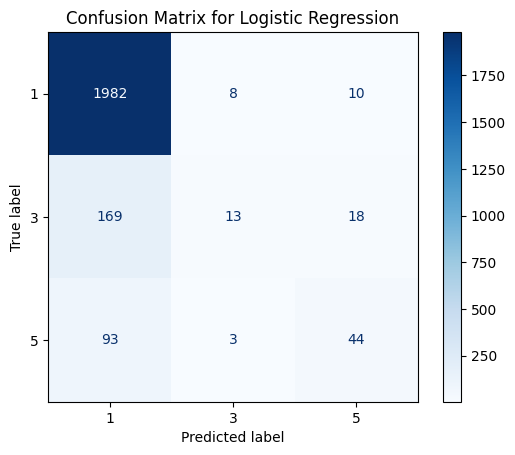

In [114]:
ingredients_data = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()
models = get_models()

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

results_df, accuracy_scores = evaluate_models(X, y)

get_ranked_models(results_df)

get_confusion_matrix(X, y, accuracy_scores, models, label_encoder)

Precision: Measures the accuracy of the positive predictions. High precision means that fewer false positives are present.

Recall: Measures the ability to capture all positive instances. High recall means that fewer false negatives are present.

F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

### SMOTE
Popular data augmentation technique used to address class imbalance in datasets.

Identify Minority Class: First, SMOTE identifies the samples belonging to the minority class in the dataset.

Select a Sample: For each sample in the minority class, SMOTE selects one or more of its nearest neighbors (usually based on Euclidean distance) within the same class.

Generate Synthetic Samples: New synthetic samples are generated along the line segments joining the selected sample and its nearest neighbors. The position of the synthetic sample is determined by selecting a random point along the line segment. This ensures that the new samples are not just copies of existing ones but are rather slightly varied versions.

Repeat the Process: This process is repeated until the desired level of balance between the classes is achieved.

                     Model           Metric     Score  Rank
15           Random Forest         accuracy  0.863167   1.0
11                 XGBoost         accuracy  0.860500   2.0
31           Decision Tree         accuracy  0.846833   3.0
7   Support Vector Machine         accuracy  0.834833   4.0
19       Gradient Boosting         accuracy  0.819667   5.0
27     K-Nearest Neighbors         accuracy  0.790333   6.0
3      Logistic Regression         accuracy  0.760167   7.0
23                AdaBoost         accuracy  0.731000   8.0
14           Random Forest         f1_macro  0.865031   1.0
10                 XGBoost         f1_macro  0.860816   2.0
30           Decision Tree         f1_macro  0.848478   3.0
6   Support Vector Machine         f1_macro  0.837447   4.0
18       Gradient Boosting         f1_macro  0.822584   5.0
26     K-Nearest Neighbors         f1_macro  0.788893   6.0
2      Logistic Regression         f1_macro  0.766770   7.0
22                AdaBoost         f1_ma

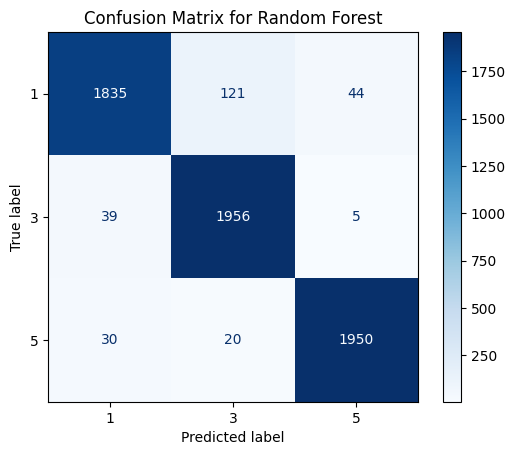

In [115]:
from imblearn.over_sampling import SMOTE

ingredients_data = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()
models = get_models()

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Convert the transformed data back to a DataFrame for visualization
transformed_df = pd.DataFrame(X_resampled)

# Can increase n_splits as more data generated with smote
results_df, accuracy_scores = evaluate_models(X_resampled, y_resampled, n_splits=3)

get_ranked_models(results_df)

get_confusion_matrix(X_resampled, y_resampled, accuracy_scores, models, label_encoder)


### Comparison of ML method to using collaborative filtering

In [116]:
# Predict preferences for all children using item-based collaborative filtering
def predict_preferences_item_based(utility_matrix, item_similarity_matrix):
    predictions = []
    for target_child_index in range(utility_matrix.shape[0]):
        # Retrieve the preferences of the target child from the utility matrix
        target_child_preferences = utility_matrix[target_child_index]
        
        # Calculate the weighted sum of item similarities
        weighted_sum = np.dot(target_child_preferences, item_similarity_matrix)
        
        # Sum of weights for normalization
        sum_of_weights = np.sum(item_similarity_matrix, axis=1)
        
        # Normalize the weighted sum to get predicted preferences
        # Use numpy's divide function to handle division by zero
        predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
        
        predictions.append(predicted_preferences)
    return np.array(predictions)

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions for all children
collaborative_predictions = predict_preferences_item_based(utility_matrix, item_similarity_matrix)

# Evaluate the collaborative filtering predictions
# Assuming y_true contains the true preferences in the same order as the children
# Here, we assume that preferences are binary or categorical

# Flatten the predictions and true values for evaluation
y_true_collab = utility_matrix.flatten()
y_pred_collab = collaborative_predictions.flatten()

# Round the collaborative filtering predictions to the nearest integer
y_pred_collab_rounded = np.round(y_pred_collab).astype(int)

# Ensure the predictions are within the valid range of classes
y_pred_collab_rounded = np.clip(y_pred_collab_rounded, y_true_collab.min(), y_true_collab.max())

# Evaluate the collaborative filtering predictions
collab_accuracy = accuracy_score(y_true_collab, y_pred_collab_rounded)
collab_precision = precision_score(y_true_collab, y_pred_collab_rounded, average='macro', zero_division=0)
collab_recall = recall_score(y_true_collab, y_pred_collab_rounded, average='macro', zero_division=0)
collab_f1 = f1_score(y_true_collab, y_pred_collab_rounded, average='macro', zero_division=0)

print("\nCollaborative Filtering Results (Rounded):")
print(f"Accuracy: {collab_accuracy}")
print(f"Precision: {collab_precision}")
print(f"Recall: {collab_recall}")
print(f"F1 Score: {collab_f1}")




Collaborative Filtering Results (Rounded):
Accuracy: 0.49743589743589745
Precision: 0.22088231081001375
Recall: 0.2168984076551567
F1 Score: 0.18732862818319354


Based on the results, it is evident that the machine learning method currently outperforms the collaborative filtering approach. However, it's important to note that with significantly larger datasets or improvements in data quality, the collaborative filtering method could potentially become more effective and surpass the performance of the machine learning models.

### Negotiation of preference
Now that we have estimated predictions for each ingredient based on various features, we can utilise this information to create an optimized meal plan that aims to satisfy every child. Additionally, we can incorporate other relevant features and stakeholder inputs into the process, feeding this enriched data into a reinforcement learning (RL) program to further refine and enhance the meal planning strategy.

In [118]:
def get_supplier_availability():
    # Define supplier availability for ingredients
    supplier_availability = {
        "tomato": True,
        "corn": False,
        "pumpkin": True,
        "carrot": True,
        "peas": True,
        "beetroot": False,
        "cucumber": True,
        "chicken": True,
        "onion": True,
        "chard": False,
        "lettuce": True,
        "broccoli": True,
        "cauliflower": True,
        "zucchini": False,
        "spinach": True,
        "eggplant": False,
        "cabbage": True,
        "green beans": True,
        "red pepper": True,
        "potatoes": True,
        "pasta": True,
        "orange": True,
        "turkey": True,
        "kiwi": True,
        "apple": True,
        "banana": True,
        "grapes": True,
        "strawberry": True,
        "blueberry": True,
        "mango": False,
        "pineapple": True,
        "watermelon": True,
        "peach": True,
        "pear": True,
        "plum": True,
        "raspberry": True,
        "blackberry": True,
        "apricot": True,
        "avocado": True,
        "cherry": False,
        "fig": True,
        "lime": True,
        "lemon": True,
        "tangerine": True,
        "pomegranate": False,
        "grapefruit": True,
        "bell pepper": True,
        "garlic": True,
        "ginger": True,
        "kale": True,
        "mushroom": True,
        "celery": True,
        "sweet potato": True,
        "radish": True,
        "turnip": True,
        "parsnip": True,
        "butternut squash": True,
        "quinoa": True,
        "barley": True,
        "rice": True,
        "lentils": True,
        "beans": True,
        "chickpeas": True,
        "soybeans": True,
        "tofu": True,
        "salmon": True,
        "beef": True,
        "pork": True,
        "lamb": True,
        "shrimp": True,
        "crab": False,
        "lobster": True,
        "oyster": True,
        "scallop": True,
        "egg": True,
        "milk": True,
        "cheese": True,
        "yogurt": True
    }
    return supplier_availability


Get trained model using all data

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

RandomForestClassifier()

In [120]:
import pandas as pd

def predict_preference(child_features, ingredient_features, model, preprocessor):
    # Create a dictionary with combined features
    combined_features = {
        "age": [child_features["age"]],
        "gender": [1 if child_features["gender"] == "M" else 0],
        "health_consideration": [child_features["health_consideration"]],
        "favorite_cuisine": [child_features["favorite_cuisine"]],
        "ingredient": [ingredient_features["ingredient"]],
        "type": [ingredient_features["type"]],
        "color": [ingredient_features["color"]],
        "taste": [ingredient_features["taste"]],
        "preference": [5 if ingredient_features["ingredient"] in preferences[child]["likes"] else
                       3 if ingredient_features["ingredient"] in preferences[child]["neutral"] else 1]
    }
    
    # Create a DataFrame from the combined features dictionary
    df = pd.DataFrame(combined_features)
    
    X_preprocessed = preprocessor.transform(df)

    # Predict using the model
    y_pred = model.predict(X_preprocessed)
    
    return y_pred[0]

In [121]:
def collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data):
    supplier_availability = get_supplier_availability()
    available_ingredients = {ingredient: 0 for ingredient, details in ingredients_data.items() if details['type'] == ingredient_type and supplier_availability.get(ingredient, False)}
    unavailable_ingredients = [ingredient for ingredient, available in supplier_availability.items() if not available and ingredient in ingredients_data and ingredients_data[ingredient]['type'] == ingredient_type]
    
    for child, pref in preferences.items():
        child_features = {
            "age": child_data[child]["age"],
            "gender": 1 if child_data[child]["gender"] == "M" else 0,
            "health_consideration": child_data[child]["health_consideration"],
            "favorite_cuisine": child_data[child]["favorite_cuisine"]
        }
        
        likes = set(pref["likes"])
        neutrals = set(pref["neutral"])
        dislikes = set(pref["dislikes"])
        
        for ingredient in available_ingredients.keys():
            if ingredient in likes:
                available_ingredients[ingredient] += 5
            elif ingredient in neutrals:
                available_ingredients[ingredient] += 3
            elif ingredient not in dislikes:
                ingredient_details = ingredients_data[ingredient]
                ingredient_features = {
                    "ingredient": ingredient,
                    "type": ingredient_details["type"],
                    "color": ingredient_details["color"],
                    "taste": ingredient_details["taste"]
                }
                predicted_preference = predict_preference(child_features, ingredient_features, rf_model, preprocessor)
                available_ingredients[ingredient] += predicted_preference
    
    return available_ingredients, unavailable_ingredients

def negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data):
    ingredient_types = set(details['type'] for details in ingredients_data.values())
    negotiated_ingredients = {}
    unavailable_ingredients = {}

    for ingredient_type in ingredient_types:
        votes, unavailable = collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data)
        sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
        negotiated_ingredients[ingredient_type] = sorted_ingredients
        if unavailable:
            unavailable_ingredients[ingredient_type] = unavailable
    
    return negotiated_ingredients, unavailable_ingredients


In [122]:
ingredients_data = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()

# Example usage
negotiated_ingredients, unavailable_ingredients = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)
print("Negotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")
    
print("\nUnavailable ingredients", unavailable_ingredients)


Negotiated order of preferred ingredients by type:
Fruit: orange, kiwi, apple, banana, grapes, strawberry, blueberry, pineapple, watermelon, peach, pear, plum, raspberry, blackberry, apricot, avocado, fig, lime, lemon, tangerine, grapefruit
Protein: chicken, turkey, tofu, salmon, beef, pork, lamb, shrimp, lobster, oyster, scallop, egg
Dairy: milk, cheese, yogurt
Legume: lentils, beans, chickpeas, soybeans
Grain: pasta, quinoa, barley, rice
Fungi: mushroom
Vegetable: carrot, pumpkin, tomato, red pepper, onion, peas, broccoli, spinach, cucumber, lettuce, cabbage, cauliflower, green beans, kale, sweet potato, butternut squash, bell pepper, celery, potatoes, garlic, ginger, radish, turnip, parsnip

Unavailable ingredients {'fruit': ['mango', 'cherry', 'pomegranate'], 'protein': ['crab'], 'vegetable': ['corn', 'beetroot', 'chard', 'zucchini', 'eggplant']}


## Complete Workflow

+ Retrieve Data
+ Train predictor model
+ Negotiate Order
+ Retrieve Feedback
+ Update Preferences with Feedback
+ Update Predictor Model

+ Example Meal Plan: [onions, red pepper, egg plant, chicken, cauliflower, potatoes]

### Retrieving Data

In [123]:

child_data = get_child_data()
ingredients_data = get_ingredient_data()
preferences = get_preference_data()


### Train Predictor Model

In [124]:
from imblearn.over_sampling import SMOTE
# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE to augment data so classes are balanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)


RandomForestClassifier()

### Negotiate order of preference

In [125]:
negotiated_ingredients, old_unavailable = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)

print("Negotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")

Negotiated order of preferred ingredients by type:
Fruit: orange, kiwi, apple, banana, grapes, strawberry, blueberry, pineapple, watermelon, peach, pear, plum, raspberry, blackberry, apricot, avocado, fig, lime, lemon, tangerine, grapefruit
Protein: chicken, turkey, tofu, salmon, beef, pork, lamb, shrimp, lobster, oyster, scallop, egg
Dairy: milk, cheese, yogurt
Legume: lentils, beans, chickpeas, soybeans
Grain: pasta, quinoa, barley, rice
Fungi: mushroom
Vegetable: carrot, pumpkin, tomato, red pepper, onion, peas, broccoli, spinach, cucumber, lettuce, cabbage, cauliflower, green beans, kale, sweet potato, butternut squash, bell pepper, garlic, celery, potatoes, ginger, radish, turnip, parsnip


### Get Feedback

In [126]:
feedback = get_feedback()

### Update Preferences with Feedback

In [127]:
from transformers import pipeline
import torch

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1

# Load the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english", device=device)

# Function to analyze the sentiment of each sentence using BERT
def analyze_sentiment(sentence):
    result = sentiment_analyzer(sentence)
    label = result[0]['label']
    score = result[0]['score']
    
    # Determine the polarity based on the sentiment label
    if label == 'POSITIVE':
        polarity = score
    else:
        polarity = -score
    return polarity

# Collect feedback and get initial preferences
preferences = get_preference_data()

# Update children_data and get the list of changes
changes, updated_preferences = extract_preferences_and_update_data(preferences, feedback)

# # Display the changes
display_changes(changes)

Child child1 had red pepper added to dislikes, removed from neutral.
Child child1 had chicken added to likes.
Child child2 had chicken added to dislikes.
Child child2 had potatoes added to dislikes.
Child child3 had chicken added to likes.
Child child3 had cauliflower added to likes, removed from dislikes.
Child child3 had onion added to likes, removed from neutral.
Child child4 had chicken added to likes.
Child child5 had cauliflower added to likes, removed from dislikes.
Child child5 had potatoes added to likes.
Child child6 had onion added to dislikes, removed from likes, removed from dislikes.
Child child6 had chicken added to likes.
Child child6 had potatoes added to likes.
Child child7 had chicken added to likes.
Child child7 had potatoes added to likes.
Child child8 had chicken added to likes.
Child child8 had potatoes added to likes.
Child child9 had chicken added to likes.
Child child10 had red pepper added to dislikes, removed from neutral.
Child child10 had chicken added to 

### Retrain predictor model with updated preferences

In [128]:
from imblearn.over_sampling import SMOTE
# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(updated_preferences, ingredients_data, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE to augment data so classes are balanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)


RandomForestClassifier()

### New supplier availability list

In [129]:
def get_supplier_availability():
    # Define supplier availability for ingredients
    supplier_availability = {
        "tomato": True,
        "corn": False,
        "pumpkin": True,
        "carrot": True,
        "peas": True,
        "beetroot": True,
        "cucumber": False,
        "chicken": True,
        "onion": True,
        "chard": False,
        "lettuce": True,
        "broccoli": True,
        "cauliflower": True,
        "zucchini": False,
        "spinach": True,
        "eggplant": False,
        "cabbage": True,
        "green beans": True,
        "red pepper": False,
        "potatoes": True,
        "pasta": True,
        "orange": True,
        "turkey": True,
        "kiwi": True,
        "apple": True,
        "banana": True,
        "grapes": True,
        "strawberry": True,
        "blueberry": True,
        "mango": False,
        "pineapple": True,
        "watermelon": True,
        "peach": True,
        "pear": True,
        "plum": True,
        "raspberry": True,
        "blackberry": True,
        "apricot": True,
        "avocado": True,
        "cherry": False,
        "fig": True,
        "lime": True,
        "lemon": True,
        "tangerine": True,
        "pomegranate": False,
        "grapefruit": True,
        "bell pepper": True,
        "garlic": True,
        "ginger": True,
        "kale": True,
        "mushroom": True,
        "celery": True,
        "sweet potato": True,
        "radish": True,
        "turnip": True,
        "parsnip": True,
        "butternut squash": True,
        "quinoa": True,
        "barley": True,
        "rice": True,
        "lentils": True,
        "beans": True,
        "chickpeas": True,
        "soybeans": True,
        "tofu": True,
        "salmon": True,
        "beef": True,
        "pork": True,
        "lamb": True,
        "shrimp": True,
        "crab": False,
        "lobster": True,
        "oyster": True,
        "scallop": True,
        "egg": True,
        "milk": True,
        "cheese": True,
        "yogurt": True
    }
    return supplier_availability


### Renegotiate order of preference

In [130]:
negotiated_ingredients_after_feedback, new_unavailable = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)

print("Renegotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")

Renegotiated order of preferred ingredients by type:
Fruit: orange, kiwi, apple, banana, grapes, strawberry, blueberry, pineapple, watermelon, peach, pear, plum, raspberry, blackberry, apricot, avocado, fig, lime, lemon, tangerine, grapefruit
Protein: chicken, turkey, tofu, salmon, beef, pork, lamb, shrimp, lobster, oyster, scallop, egg
Dairy: milk, cheese, yogurt
Legume: lentils, beans, chickpeas, soybeans
Grain: pasta, quinoa, barley, rice
Fungi: mushroom
Vegetable: carrot, pumpkin, tomato, red pepper, onion, peas, broccoli, spinach, cucumber, lettuce, cabbage, cauliflower, green beans, kale, sweet potato, butternut squash, bell pepper, garlic, celery, potatoes, ginger, radish, turnip, parsnip


### Compare two negotiated lists to see what has changed

In [131]:
def generate_ordered_list(ingredients_list):
    return {ingredient: index + 1 for index, ingredient in enumerate(ingredients_list)}

def compare_negotiated_ingredients(old_ingredients, new_ingredients, old_unavailable, new_unavailable):
    changes = {}

    all_ingredient_types = set(old_ingredients.keys()).union(new_ingredients.keys()).union(old_unavailable.keys()).union(new_unavailable.keys())

    for ingredient_type in all_ingredient_types:
        old_list = old_ingredients.get(ingredient_type, [])
        new_list = new_ingredients.get(ingredient_type, [])
        old_unavail_list = old_unavailable.get(ingredient_type, [])
        new_unavail_list = new_unavailable.get(ingredient_type, [])

        old_order = generate_ordered_list(old_list)
        new_order = generate_ordered_list(new_list)

        order_changes = []
        for ingredient in set(old_order.keys()).union(new_order.keys()).union(old_unavail_list).union(new_unavail_list):
            old_pos = old_order.get(ingredient, None)
            new_pos = new_order.get(ingredient, None)
            
            if ingredient in old_unavail_list:
                old_pos = 'Unavailable'
            if ingredient in new_unavail_list:
                new_pos = 'Unavailable'
                
            if old_pos != new_pos:
                order_changes.append((ingredient, old_pos, new_pos))

        if order_changes:
            changes[ingredient_type] = order_changes

    return changes

In [132]:
changes = compare_negotiated_ingredients(negotiated_ingredients, negotiated_ingredients_after_feedback, old_unavailable, new_unavailable)

# Display the changes in a readable format
for ingredient_type, order_changes in changes.items():
    print(f"Changes in {ingredient_type}:")
    for ingredient, old_pos, new_pos in order_changes:
        print(f"{ingredient}: Pos: {old_pos} -> Pos: {new_pos}")

Changes in vegetable:
celery: Pos: 19 -> Pos: 18
sweet potato: Pos: 15 -> Pos: 14
potatoes: Pos: 20 -> Pos: 4
ginger: Pos: 21 -> Pos: 20
parsnip: Pos: 24 -> Pos: 23
turnip: Pos: 23 -> Pos: 22
butternut squash: Pos: 16 -> Pos: 15
lettuce: Pos: 10 -> Pos: 9
cucumber: Pos: 9 -> Pos: Unavailable
red pepper: Pos: 4 -> Pos: Unavailable
kale: Pos: 14 -> Pos: 16
beetroot: Pos: Unavailable -> Pos: 12
cabbage: Pos: 11 -> Pos: 10
garlic: Pos: 18 -> Pos: 19
radish: Pos: 22 -> Pos: 21
cauliflower: Pos: 12 -> Pos: 11


# Fairness ?

### Fair Distribution of Votes

The initial weighting method was based on the total number of preferences (likes, neutrals, and dislikes) each child has. This approach may inadvertently give more influence to children with more preferences overall, including a large number of dislikes. To address this and ensure a fairer distribution of votes, we should adjust the weights more thoughtfully based on the type of preferences.

#### Normalizing Weights
Normalize the weights so that each child has a comparable influence regardless of the number of preferences they have in each class. For example, if one child dislikes 20 ingredients while another child dislikes only 2, the child with fewer preferences would have a small impact on the vote. In reality, this should be normalized so each child's vote is balanced.

#### Fairness Principles
1. **Equity Principle**: We integrated the equity principle by considering the weight of each child’s preferences.
2. **Need Principle**: 
    - Ensured basic needs (preferences) are considered first, aligning with the need principle. Specifically, we prioritize the allocation of votes to ingredients that are universally considered important.
    - This principle is addressed by categorizing ingredients by type, ensuring that an ingredient from each group is chosen. 
    - We must also ensure that no child has no ingredients they like in the top section of the list. Otherwise, their basic needs will not be met, as they will continually receive items they dislike. This situation results in one malnourished child but a slightly happier average, which is worse than having no malnourished children and a slightly unhappier group overall.

#### Meritocracy Principle
To include the principle of meritocracy, we must decide on what actions contribute to the collective goal. The collective goal of this system is average utility:
- Not solely the average utility per agent, but the average utility over time for all agents.
- We also aim to limit the variation in this utility, preferring a lower average with less variation to a higher average with large variations.

To achieve this, the weight of a child's vote will be reduced each time they drastically change their preferences. For example, if a child likes chicken one week and dislikes it the next, and keeps reversing their decisions, we will rank this child's vote lower. This approach ensures that the collective utility is not limited by unreliable individual preferences.
